# Исследование надежности заемщиков.

## Краткое описание задачи

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Задачи:

1.В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце нужно обработать на следующем этапе. Найдите другой столбец и заполните пропущенные значения в нём медианным значением:
* опишите, какие пропущенные значения вы обнаружили;
* проверьте, какую долю составляют пропущенные значения в каждом из столбцов с пропусками;
* приведите возможные причины появления пропусков в данных;
* объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.
2. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Например, отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработайте значения в столбцах с аномалиями и опишите возможные причины появления таких данных. После обработки аномалий заполните пропуски в days_employed медианными значениями по этому столбцу.
3. Заменить вещественный тип данных в столбце total_income на целочисленный, например, с помощью метода astype().
4. Если в данных присутствуют строки-дубликаты, удалить их. Также обработать неявные дубликаты. Например, в столбце education есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Привести такие значения к одному регистру. После удаления дубликатов сделать следующее:
* пояснить, как выбирали метод для поиска и удаления дубликатов в данных;
* привести возможные причины появления дубликатов.
5. Создать два новых датафрейма, в которых:
* каждому уникальному значению из education соответствует уникальное значение education_id — в первом;
* каждому уникальному значению из family_status соответствует уникальное значение family_status_id — во втором.
6. Удалить из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id. Новые датафреймы — это те самые «словари» (не путайте с одноимённой структурой данных в Python), к которым вы сможете обращаться по идентификатору.
7. На основании диапазонов, указанных ниже, создать столбец total_income_category с категориями:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.
Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.
9. Создать функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.
Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'. Можно использовать собственную функцию и метод apply(). 
10. Ответить на вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

Импортируем библиотеки:

In [79]:
import pandas as pd                    # Импортируем библиотеку pandas
import seaborn as sns                  # Импортируем библиотеку seaborn

Прочтем файл:

In [80]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv') # Считываем файл и сохраняем датафрейм как "df"
display(df.head())                   # Подаем первые 40 строк на экран для визуального анализа
df.info()                              # Общая информация о кол-ве ячеек, пропусков, и типе данных   

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Сделаем анализ данных по результатам вывода на экран первых строк датафрейма:

Столбец "children" предварительно не требует корреции: имеет целочисленный тип данных, не имеет пропусков.

Столбец "days_employed" из всех представленных наиболее поврежденный. 

Заполненных ячеек 19351 из 21525, что составляет 90%, следовательно доля пропусков составляет 10% (большая). Имеет числовой формат и дробные значения (занимает много места). Судя по описанию, в данном столбце должен отображаться трудовой стаж в днях, поэтому значения должны быть в пределе от 0 до 15000 (40лет*365 дней/году).

Данный столбец имеет значения до 20 000, но все они отрицательные и поэтому некорректные. 

Данный столбец содержит и положительные значения, но все они имеют значения более 100 000 и тоже некорректные.
Если просто удалить все такие значения, столбец окажется пустым, но он может быть полезным при составлении статистики платежеспособности клиентов для банка, поэтому необходимо принять все возможные меры для исправления значений этого столбца.

Необходимо будет вернуться к вопросу, каким образом заполнять пропуски в данном столбце(одно и тоже медианное значение 
трудового стажа как для 20-летнего, так и для 60-летнего гражданина некорректно).

Столбец "dob_years" предварительно не требует корреции: имеет целочисленный тип данных, не имеет пропусков.

Столбец "education" имеет текстовый формат, пропусков нет, регистр различается. Необходимо изменение регистра и, вероятно, перенос в другую таблицу, поскольку есть идентификаторы.

Столбец "education_id" предварительно не требует корреции: имеет целочисленный тип данных, не имеет пропусков.

Столбец "family_status" имеет текстовый формат, пропусков нет, регистр различается. Необходимо изменение регистра и, вероятно, перенос в другую таблицу, поскольку есть идентификаторы.

Столбец "family_status_id" предварительно не требует корреции: имеет целочисленный тип данных, не имеет пропусков.

Столбец "gender" имеет текстовый формат, не имеет пропусков. Нуждается в проверке на единство регистра.

Столбец "income_type" имеет текстовый формат, пропусков нет, вероятно имеет смысл оставить, как есть.

Столбец "debt" имеет целочисленный формат (1 или 2), и не имеет пропусков. Нуждается в проверке на отсутствие других вариантов, кроме значений "0" и "1".

Столбец "total_income" имеет числовой формат, имеет пропуски. Заполненных ячеек 19351 из 21525, то есть 90%.

Столбец "purpose" имееет текстовый формат с различными вариантами, столбца с идентификатора цели получения кредита нет,  потребуется его категоризация.



Перед заполнением пропусков, в том числе по столбцу "days_employed", тем более если этот метод - медианный, необходимо исправить все значения на правдоподобные. Для этого построим точечную диаграмму из 300 строк датафрейма (чтобы не перегружать программу), где по оси x - будет возраст клиента, по оси у - существующие значения из столбца "days_employed", при условии, что значения составляют менее 100 000:

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

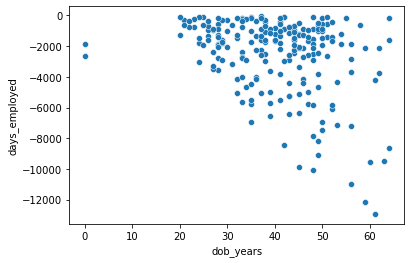

In [81]:
df_test = df[0:301]                                        # Создаем срез для теста
df_test = df_test[df_test['days_employed']<100000]         # Фильтруем, чтобы значения были менее 100 000 
#df_test.tail(50)                                          # Проверяем
sns.scatterplot(x=df_test['dob_years'],y=df_test['days_employed']) # Создаем точечную диаграмму

Отлично! Первое, что бросается в глаза - наличие клиентов банка с нулевым возрастом, запомним это для последующей работы.
В остальном точечная диаграмма везде отображает достоверный трудовой стаж в днях (но везде со знаком минус) с пределом до -13000 (то есть 13000/365 = 35 лет). 

Необходимо отметить, что фиксируется большая доля клиентов с низким трудовым стажем менее 2 000 дней (до 6 лет), вероятно это женщины - домохозяйки, ранее обеспечиваемые мужчинами (если они обратились в банк, то вероятно этот источник дохода иссяк), и мужчины, не имеющие постоянного места работы и нестабильный доход. Исключать такие важные данные для анализа платежеспособности банка считаю недопустимым.

Следовательно, для исправления значения стажа в столбце "days_employed" основного датафрейма, если значение меньше 100 000, необходимо значение столбца умножить на -1, или вывести модуль числа при помощи функции abs().

Теперь необходимо разобраться со значениями в данном столбце, превышающими 100 000.

Для этого построим точечную диаграмму из 5000 строк датафрейма, где по оси x - будет возраст клиента, по оси у - существующие значения из столбца "days_employed", при условии, что значения составляют более 100 000:

16.004645760743323

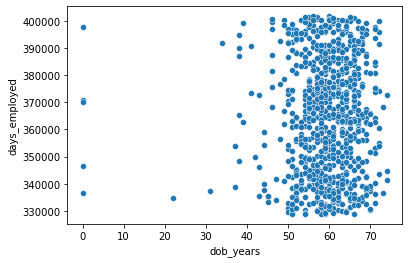

In [82]:
df_test = df[0:5000]                                               # Создаем срез для теста
df_test = df_test[df_test['days_employed']>100000]                 # Фильтруем, чтобы значения были более 100 000 
#display(df_test.head(50))                                         # Проверяем
sns.scatterplot(x=df_test['dob_years'],y=df_test['days_employed']) # Создаем точечную диаграмму
df[df['days_employed']>10000]['days_employed'].count()/21525*100   # определим процент таких данных

Видно, что значения столбца "dob_years" больше 100 000 в большинстве случаев принадлежат клиентам в возрасте 50-70 лет. 
Максимум значения в районе 400 000 дней, то есть якобы 400 000/365 = 1096 лет.

На этом графике нет совокупности точек по диаганали, которые отображают прямую зависимость роста трудового стажа от возраста после 20-25 лет (стаж в 1096 лет характерен как для 75 летних клиентов, так и для 50-летних), поэтому данные значения не имеют ничего общего с реальным трудовым стажем.

Минимальные значения около 330 000 дней, то есть якобы 330 000/365 = 904 года. Нет значений ни 150 тыс, ни 200, ни 250, ни 300 тысяч, что подтверждает отсутствие связи с реальным трудовым стажем.

То есть, указанные значения не пропорциональны реальному трудовому стажу. 

Предположение, что указанные значения трудового стажа содержат трудовой стаж не в днях, а в часах (и что можно получить адекватные значения стажа, разделив значения на 24, или какое-то другое число) опровергнуто.

В связи с этим, предлагается те значения столбца "dob_years", которые составляют более 100 000, заменить на более адекватные, как и пропуски. 

Таких данных, увы, 16% от общего количества.

Перед заполнением пропусков медианным значением откорректируем существующие данные в столбце "dob_years" (иначе медиана будет определена некорректно):

In [83]:
df.loc[df['days_employed']>100000,'days_employed']=0 # методом loc заменим значение в столбце "days_employed" на 0 
# согласно списку (False/True) соответствующему выражению df['days_employed']>100000
df.loc[df['days_employed']<0,'days_employed']=abs(df['days_employed'])# методом loc возвратим модуль значения этого столбца 
# согласно списку (False/True) соответствующему выражению df['days_employed']<0
#df.head(40)                                             # Проверка

### Шаг 2.1 Заполнение пропусков

Начнем с заполнения пропусков в столбце 'total_income', где достаточно медианного значения, которое в отличие от среднего арифметического значения, возратит значение, которое наиболее близко для большинства клиентов.
Затем заполним пропуск для столбца 'days_employed'.

In [84]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median()) #замена пропусков для дохода по медиане
#df['days_employed']=df['days_employed'].fillna(df['days_employed'].median()) #так можно было бы заменить пропуски в столбце 
# 'days_employed' медианой, но автор считает, что в данном случае это навередит анализу

Замена пропусков и нулевых значений для столбца "days_employed", то есть трудового стажа, по единой для всех строк датафрейма медиане - это не очень хорошая идея, потому что в этом случае будет присвоено одно и то же значение трудового стажа как для 20-летних, так и для 70-летних.

Необходимо пропускам и нулевым значениям присваивать медианное значение, дифференцированное по возрасту: для пропусков по 30-летним клиентам медианное значение определять среди 30-летних клиентов и т.д.

Это можно осуществить при помощи цикла:

In [85]:
for i in range(80):
    df_i = df[df['dob_years']==i]                            # отфильтровываем строки, где возраст клиентов = i
    model = df_i[df_i['days_employed']!=0]                   # отфильтровываем строки, где трудовой стаж не равен 0
    m=model['days_employed'].median()                        # m присваиваем значение медианы для данного возраста
    #print(i,' ',m)                                          # Контроль за ходом процесса
    condition =(df['dob_years']==i)&((df['days_employed'].isna())|(df['days_employed']==0)) # условие для функции loc,
    # с возрастом = i, и значение стажа пропущено или равно нулю
    df.loc[condition,'days_employed']=m                      # замена пропусков и нулей на медиану  

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Как видно из предыдущей ячейки, все пропуски заполнены.

Также проанализируем нулевые значения в столбце "dob_years" для принятия решения об их заполнении:


In [87]:
df[df['dob_years']==0].head(10)    # выводим 10 строк, где возраст равен нулю

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,1560.900431,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,1560.900431,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
1149,0,934.654854,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости
1175,0,1560.900431,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования
1386,0,5043.219890,0,высшее,0,женат / замужем,0,M,госслужащий,0,240523.618071,сделка с автомобилем
1890,0,1560.900431,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,145017.937533,жилье
1898,0,1560.900431,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля


В данном массиве люди с высшим и средним образованием, встречаются пенсионеры, которые брали кредит для покупки автомобиля и приобретения недвижимости. 

Ошибочным представляется здесь только нулевой возраст. Посмотрим, сколько таких значений:

In [88]:
len(df[df['dob_years']==0])

101

Всего в датафрейме 21525 строк, следовательно строк с нулевым возрастом 101/21525=0,46%, проще удалить эти строки:

In [89]:
df = df[df['dob_years']!=0]
len(df)

21424

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [90]:
# Создаем список проверяемых столбцов с данными:
columns = ['children','education','education_id','family_status','family_status_id','gender','income_type']
for i in columns:                 # Создаем цикл, который пройдет по всем значениям списка columns
    display(df[i].value_counts()) # И при помощи метода .value_counts() возвращаем перечень уникальных значений и их кол-во

 0     14080
 1      4802
 2      2042
 3       328
 20       75
-1        47
 4        41
 5         9
Name: children, dtype: int64

среднее                13691
высшее                  4686
СРЕДНЕЕ                  770
Среднее                  708
неоконченное высшее      666
ВЫСШЕЕ                   273
Высшее                   266
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

1    15169
0     5225
2      742
3      282
4        6
Name: education_id, dtype: int64

женат / замужем          12331
гражданский брак          4156
Не женат / не замужем     2797
в разводе                 1185
вдовец / вдова             955
Name: family_status, dtype: int64

0    12331
1     4156
4     2797
3     1185
2      955
Name: family_status_id, dtype: int64

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

сотрудник          11064
компаньон           5065
пенсионер           3836
госслужащий         1453
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Столбец "children": аномальные значения "-1" и "20", вероятно, их нужно заменить на "1" и "2" соответственно.

Значения столбца "education" имеет текстовый формат и разный регистр, но аномалий здесь нет.

Столбец "education_id", "family_status" и "family_status_id": аномалий нет.

Столбец "gender" имеет одну аномалию - "XNA" в количестве 1 ед. Заменим на "F".

Столбец "income_type": нет проблем.


In [91]:
df.loc[df['children']==-1,'children']=1          # замена '-1' в столбце 'children' на '1'
df.loc[df['children']==20,'children']=2          # замена '20' в столбце 'children' на '2'
df.loc[df['gender']=='XNA','gender']='F'         # замена 'XNA' в столбце 'gender' на 'F'
display(df['children'].value_counts())           # Проверим результат исправления
df['gender'].value_counts()

0    14080
1     4849
2     2117
3      328
4       41
5        9
Name: children, dtype: int64

F    14165
M     7259
Name: gender, dtype: int64

Промежуточный вывод: аномалии ликвидированы.

### Шаг 2.3. Изменение типов данных.

Для нужд аналитики имеет смысл изменить тип данных для столбцов 'days_employed' и 'total_income' на целочисленный, поскольку такая точность при анализе не востребована, а обработку данных будет задерживать:


In [92]:
display(df.duplicated().sum())                    # Выведем на экран количество дубликатов (до изменения типа = округления)
columns = ['days_employed','total_income']        # Создаем список изменяемых столбцов с данными:
for i in columns:                                 # Создаем цикл, который пройдет по всем значениям списка columns
    df[i] = df[i].astype('int')                     # И при помощи метода .astype меняем тип
df.head()                                         # Посмотрим на результат

54

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,2252,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Итог: таблица уже выглядит гораздо более приятно

### Шаг 2.4. Удаление дубликатов.

In [93]:
df.duplicated().sum()                 # Выведем на экран количество дубликатов (после изменения типа = округления)

54

Удивительно, количество дубликатов после округления не увеличилось, значит ни один из них не появился в результате округления, следовательно их все смело можно удалить:

In [94]:
df=df.drop_duplicates()               # Удалим явные дубликаты
df.duplicated().sum()                 # и еще раз выведем на экран их количество для проверки

0

Итог: явные дубликаты удалены.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Сделаем дополнительный датафрейм-словарь для возращения информации об образовании по значениям столбца "education_id":


In [95]:
df_education = df[['education','education_id']]                     # Создаем новый датафрейм-словарь "как есть"
#df_education['education']=df_education['education'].str.lower()   # Такой вариант изменения регистра Питон не рекомендует
df_education = df_education.drop_duplicates().reset_index(drop=True) # Удаляем дубликаты с обновлением индексов
df_education['education']=df_education['education'].str.lower()    # А теперь после удаления дубликатов идет нормально
df_education = df_education.drop_duplicates().reset_index(drop=True) # И еще раз удаляем дубликаты... с обновлением индексов
display(df_education.head(20))                                     # Выводим на экран датафрейм-словарь
df.drop(columns = ['education'], axis = 1,inplace=True)            # Удаляем ставший ненужным столбец
df.head()                                                          # Выводим на экран основной датафрейм

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


,children,days_employed,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,2252,53,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Сделаем дополнительный датафрейм-словарь для возращения информации об образовании по значениям столбца "family_status_id'":


In [96]:
df_family = df[['family_status','family_status_id']]               # Создаем новый датафрейм-словарь 
df_family = df_family.drop_duplicates().reset_index(drop=True)     # Удаляем дубликаты с обновлением индексов
display(df_family.head(20))                                        # Результат на экран
df.drop(columns = ['family_status'], axis = 1,inplace=True)        # Удаляем ненужный столбец
df.head()                                                          # Выводим на экран основной датафрейм

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,2252,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


Создадим дополнительный датафрейм-словарь для возвращения информации об источнике дохода и создадим в основном датафрейме новый столбец income_type_id:

In [ ]:
data_income_type = [['сотрудник',0],['компаньон',1],['пенсионер',2],['госслужащий',3],['безработный',4],
                    ['предприниматель',5],['студент',6],['в декрете',7]]   # Создаем список с содержимым каждой строки
columns_income_type = ['income_type','income_type_id']                     # Создаем список с заголовками столбцов
df_income_type = pd.DataFrame(data=data_income_type,columns=columns_income_type)# Создаем датафрейм-словарь для ист.дохода
df_income_type.head(10)      

In [98]:
for i in df_income_type['income_type_id']:                           # Создаем цикл, который поочередно пройдет все id
    df.loc[df['income_type']==df_income_type.loc[i,'income_type'],'income_type_id']=i
# При соответствии значения в столбце 'income_type' основного датафрейма аналогичному значению в словаре, в новом столбце
# в новом столбце 'income_type_id' основного датафрейма возращается id, но почему-то тип данных становится float
df['income_type_id']=df['income_type_id'].astype('int')              # Меняем типа данных на integer
df.drop(columns = ['income_type'], axis = 1,inplace=True)            # Удаляем ненужный столбец
df.head(20)             

,children,days_employed,dob_years,education_id,family_status_id,gender,debt,total_income,purpose,income_type_id
0,1,8437,42,0,0,F,0,253875,покупка жилья,0
1,1,4024,36,1,0,F,0,112080,приобретение автомобиля,0
2,0,5623,33,1,0,M,0,145885,покупка жилья,0
3,3,4124,32,1,0,M,0,267628,дополнительное образование,0
4,0,2252,53,1,1,F,0,158616,сыграть свадьбу,2
5,0,926,27,0,1,M,0,255763,покупка жилья,1
6,0,2879,43,0,0,F,0,240525,операции с жильем,1
7,0,152,50,1,0,M,0,135823,образование,0
8,2,6929,35,0,1,F,0,95856,на проведение свадьбы,0
9,0,2188,41,1,0,M,0,144425,покупка жилья для семьи,0


### Шаг 2.6. Категоризация дохода.

Осуществим категоризацию ежемесячного дохода с возвращением буквенного обозначения категории в отдельном столбце:


In [99]:
def model_income(i):                                                        # Создаем функцию, упрощающую категоризацию
    if i<=30000:                                                            # Если total_income меньше 30 000, то 'Е'
        return 'E'                                    
    if i<=50000:                                                            # Если больше 30 000 но меньше 50 000, то 'D'
        return 'D'                                                         
    if i<=200000:                                                           # Если больше 50 000 но меньше 200 000, то 'C'
        return 'C'                                                           
    if i<=1000000:                                                          # Если больше 200 000 но меньше 1000 000, то 'B'
        return 'B'
    return 'A'                                                              # Если еще больше, то "А"
df['total_income_category']=df['total_income'].apply(model_income)          # Активируем функцию методом .apply
df.head()                                                                   # Выводим на экран основной датафрейм

,children,days_employed,dob_years,education_id,family_status_id,gender,debt,total_income,purpose,income_type_id,total_income_category
0,1,8437,42,0,0,F,0,253875,покупка жилья,0,B
1,1,4024,36,1,0,F,0,112080,приобретение автомобиля,0,C
2,0,5623,33,1,0,M,0,145885,покупка жилья,0,C
3,3,4124,32,1,0,M,0,267628,дополнительное образование,0,B
4,0,2252,53,1,1,F,0,158616,сыграть свадьбу,2,C


### Шаг 2.7. Категоризация целей кредита.

Создадим функцию и дополнительный cтолбец 'purpose_category' с категорией получения кредита:

In [100]:
def model(i):                                                               # Создаем функцию, упрощающую категоризацию
    if ('недвиж' in i)or('жиль' in i):                                      # Если в 'purpose' что-то про жилье, то
        return 'операции с недвижимостью'                                    
    if 'автомоб' in i:                                                      # Если про автомобили, то
        return 'операции с автомобилем'                                                         
    if 'образован' in i:                                                    # Если про образование, то
        return 'получение образования'                                                           
    if 'свадьб' in i:                                                       # Если про заключение брака, то
        return 'проведение свадьбы'                                                           
df['purpose_category']=df['purpose'].apply(model)                           # Активируем функцию методом .apply
df.drop(columns = ['purpose'], axis = 1,inplace=True)                       # Удаляем ненужный столбец
df.head()                                                                   # Выводим на экран основной датафрейм
#df.info()                                                                  # Для проверки пропусков - их нет

,children,days_employed,dob_years,education_id,family_status_id,gender,debt,total_income,income_type_id,total_income_category,purpose_category
0,1,8437,42,0,0,F,0,253875,0,B,операции с недвижимостью
1,1,4024,36,1,0,F,0,112080,0,C,операции с автомобилем
2,0,5623,33,1,0,M,0,145885,0,C,операции с недвижимостью
3,3,4124,32,1,0,M,0,267628,0,B,получение образования
4,0,2252,53,1,1,F,0,158616,2,C,проведение свадьбы


### Ответы на вопросы.

##### Вопрос 1: "Есть ли зависимость между количеством детей и возвратом кредита в срок?"

Для начала определим средний процент задержки невозврата кредита в среднем по базе данных, от которого можно оттолкунться в процессе аналитики: 

In [101]:
df['debt'].mean()

0.08109499298081423

Итого случаев задержек с кредитами в среднем 0,081 или 8,1%. Для ответа на первый вопрос построим сводную таблицу со значением среднего значения просрочки по кредитам, дифференцированного (или сгруппированного) по количеству детей:

In [102]:
income_children = df.pivot_table(columns='children',values='debt',aggfunc='mean')
income_children.head(10)

children,0,1,2,3,4,5
debt,0.075367,0.091322,0.095553,0.082317,0.097561,0.0


Отвечая на поставленный вопрос, можно заключить, что есть прямая зависимость от количества детей у заемщика. 

Так, у бездетных клиентов процент просрочки 7,5, что меньше, чем в среднем по базе данных.

У клиентов с одним ребенком процент просрочки составил 9,1% что выше среднего (8,1%).

У клиентов с двумя детьми процент просрочки составил 9,5%, что еще выше, чем при одном ребенке.

У клиентов с тремя детьми процент просрочки составил 8,2%, что примерно равно среднему значению.

У клиентов с четырьмя детьми процент просрочки составил 9,6%, однако эти данные могут быть искажены из-за малого количества таких записей.

Подвергать анализу возврат кредита с 5 детьми не имеет смысла из-за слишком малого количества таких записей.

Оданко эти колебания незначительные и, можно сказать, что количество детей в разумных пределах (от 1 до 3) имеет весьма малое влияние на возврат кредита в срок (при этом очевидно, что бездетные клиенты возвращают кредиты чуть лучше, чем имеющие детей). Гораздо важнее то, в какой семье эти дети.

Для более полного анализа расширим сводную таблицу, добавив в него семейное положение:

In [103]:
pivot_children = df.pivot_table(index='family_status_id',columns='children',values='debt',aggfunc='mean')
display(df_family.head(20))      # Отобразим для наглядности дополнительный датафрейм-словарь-легенду семейного положения
pivot_children.head(10)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


children,0,1,2,3,4,5
family_status_id,,,,,,
0,0.069067,0.081748,0.094088,0.068826,0.103448,0.0
1,0.083211,0.118593,0.093484,0.142857,0.000000,0.0
2,0.061758,0.086420,0.125000,0.000000,0.000000,NaN
3,0.070785,0.066667,0.098765,0.090909,0.000000,NaN
4,0.093375,0.112832,0.120482,0.125000,0.500000,NaN


Итак, по данной сводной таблице можно увидеть, что количество детей не имеет значения на возврат кредита, если  клиент женат/замужем (строка №0). Эта категория клиентов возвращает кредиты примерно также, как среднестатистический клиент.

Несколько хуже обстоит картина с клиентами, находящимися в разводе (строка №3). По этой категории риск неввозврата кредита становится выше среднего по базе данных.

Еще хуже дела с клиентами, которые являются вдовами/вдовцами (строка №2). При одном ребенке средний невозврат по кредиту составил 8,6 % (что всё-таки не так далеко от среднего). А у клиентов с двумя детьми, увы, процент невозврата резко возрастает до 12,5%. Это категория с повышенным риском. Отстутствие данных о выдаче кредитов вдовам с тремя детьми, вероятно, свидетельствует о запрете в выдаче кредитов банком такой категории.

Однако еще хуже обстоят дела с возвратом кредитов неожиданной категории - клиентов с детьми, находящихся в гражданском браке (хуже разведенных и вдов/вдовцов!), это строка №1. В этой категории процент невозврата кредита уже с одним ребенком составляет 11,8%, с двумя составил 9,3%, с тремя 14,3%.

И абсолютный лидер данного антирейтинга - клиенты с детьми, не состоящие в браке вообще. По этой категории процент невозврата кредита составил 11,4 %, 11,9%, 12,5% при наличии 1, 2 и 3 детей соответственно. 

Резюмируя данное исследование, можно сделать вывод о необходимости банку более щепетильно относится к выдаче кредитов с детьми клиентам, находящихся в гражданском браке и, тем более, к одиноким клиентам, не состоящим в отношениях.

##### Вопрос 2: "Есть ли зависимость между семейным положением и возвратом кредита в срок?"

Построим сводную таблицу невозврата кредита с дифференциацией по семейному положению:

In [104]:
pivot_family = df.pivot_table(columns='family_status_id',values='debt',aggfunc='mean')
display(df_family.head(20))      # Отобразим для наглядности дополнительный датафрейм-словарь-легенду семейного положения
pivot_family.head(10)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


family_status_id,0,1,2,3,4
debt,0.075397,0.093192,0.06499,0.07173,0.097709


Надо отметить, что в такой сводной таблице (без наложения количества детей) разница по проценту невозврата незначительная: минимум 6,5%, максимум 9,8%. Тем не менее, и здесь заметно антилидерство категории "в гражданском браке" - 9,3%, "не женат/не замужем" - 9,8%. Хороший результат у разведенных (7,1%), что даже ниже среднего значения (8,1%), и неожиданно отличный у вдовцов и вдов (6,6%). Вероятно из-за того, что вдовам с тремя детьми кредиты не выдаются вообще, поэтому процент невозврата тут оказался заниженным, поэтому к нему нужно относиться с недоверием. Самый недежная и дисциплинированная категория заемщиков - женатые/замужние клиенты с процентом невозврата 7,5 - ниже среднего.

##### Вопрос 3: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?"

Построим сводную таблицу невозврата кредита с дифференциацией по категориям дохода:


In [105]:
pivot_income = df.pivot_table(columns='total_income_category',values='debt',aggfunc='mean')
pivot_income.head(10)

total_income_category,A,B,C,D,E
debt,0.08,0.070788,0.084774,0.060345,0.090909


Здесь результаты ожидаемо неоднозначные: очевидно, что категория "Е" с самыми низкими доходами (едва решающая свои финансовые вопросы), кредиты возвращает плохо - 9,1%. Самая надежная категория в данном рейтинге - "D" с низким доходом. Вероятно, выдача кредитов именно этой категории открывает им новые возможности и перспективы и, как следствие, способствует низкому проценту невозврата кредита. Снижение возврата кредитов по категориям заемщиков с более высоким доходом "С", "В" и "А", вероятно, связана и с большими запросами(более дорогостоящими автомобилями и недвижимостью) представителями данной категории. Однако, аномально высокие доходы имеют свойство иногда заканчиваться, что приводит к невозможности возврата кредитов.

##### Вопрос 4 "Как разные цели кредита влияют на его возврат в срок?"

Построим сводную таблицу невозврата кредита с дифференциацией по целям кредита:


In [106]:
pivot_purpose = df.pivot_table(columns='purpose_category',values='debt',aggfunc='mean')
pivot_purpose.head()

purpose_category,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
debt,0.093327,0.072351,0.092593,0.079276


Согласно предоставленных данных, самый низкий невозврат кредитов фиксируется по операциям с недвижимостью - 7,2%, средний невозврат на проведение свадеб - 8%, и сравнительно высокий (в среднем по всем остальным категориям) на получение образования 9,2% и на операции с автомобилем 9,3%.

##### Самостотельное исследование по вопросу "Как общий трудовой стаж влияет на возврат кредита в срок?"

Предлагается исследовать величину возврат кредита в зависимости от трудового стажа. В ходе визуального анализа данных автором было обращено внимание на высокий невозврат кредита у клиентов с низким стажем, и пользуясь случаем, было бы интересно проверить гипотезу "Низкий стаж негативно влияет на возврат кредитов".

Создадим дополнительный расчетный показатель полноты трудового стажа по формуле:

k=(days_employed/365)/(dob_years-20-female_children+0.00001)

То есть k - соотношение трудового стажа в годах к возрасту клиента, за минусом 20 лет (средний возраст начала трудовой деятельности) и за минусом времени на дикретный отпуск для женщин, рассчитываемых по формуле:

Если gender=="F": female_children = children * 3  (то есть по три года на каждого ребенка для женщин)

Примечание: чтобы первая формула не давала ошибку для 20 летних мужчин без детей (деление на ноль), в формулу добавлено бесконечно малое число 0,0000.

Полученный показатель сразу следует категоризировать между категориями 0-0,3 (самый низкий); 0,4-0,6; 0,6-0,8; 0,8 и более:

In [107]:
def model(stroka):                                  # Создаем функцию
        gender = stroka['gender']                   # Извлекаем пол
        children = stroka['children']               # Извлекаем количество детей
        days_employed = stroka['days_employed']     # Извлекаем трудовой стаж в днях
        dob_years = stroka['dob_years']             # Извлекаем возраст клиента
        female_children = 0                         # Обнуляем переменную
        if gender=='F':                             # Если клиент - женщина...
            female_children = children*3            # то переменной присвоить по три года на каждого ребенка
        k = (days_employed/365)/(dob_years-20-female_children+0.000000001)   # Расчет показателя (соотношения)
        if k<=0.3:                                                           # далее присвоение категорий
            return '<0.3'                                    
        if k<=0.6:                                                           
            return '0.3-0.6'                                                         
        if k<=0.8:                                                           
            return '0.6-0.8'                                                           
        return '0.8-1,0'
df['k_employed']=df.apply(model,axis=1)              # Активируем функцию
#df.head(40)                                         # Проверяем что вышло

In [108]:
pivot_k_employed = df.pivot_table(index='gender',columns='k_employed',values='debt',aggfunc='mean')
pivot_k_employed.head()

k_employed,0.3-0.6,0.6-0.8,"0.8-1,0",<0.3
gender,,,,
F,0.077329,0.079218,0.072531,0.065933
M,0.105039,0.070076,0.093706,0.107061


С одной стороны, из представленной базы данных следует, что возврат кредита у женщин практически не зависит от трудового стажа.

У мужчин, как и предполагалось, наивысший процент невозврата кредитов наблюдается у клиентов с маленьким трудовым стажем по категории "<0.3" (10,7%), что может свидетельствовать о склонности к непостонном зароботкам, нестабильной финансовой ситуации и следовательно, риску невозврата кредита.

По категории "0,3-0,6" процент невозврата кредита похожий (10,5%).

По категории "0,6-0,8" процент невозврата кредита самый низкий среди мужчин (7%).

По категории "0,8-1,0", то есть с максимально большим трудовым стажем, процент невозврата кредита неожиданно возрастает до 9,3%, что противоречит первоначальной гипотезе. 

В любом случае подтверждается увеличение риска невозврата кредита мужчинами с низким трудовым стажем относительно возраста.

## Общий вывод:

**В ходе проектной работы было выявлено влияние на возврат кредита в срок:**

**Количества детей у клиентов.**
У бездетных клиентов процент просрочки 7,5 ниже, чем в среднем по базе данных и ниже, чем у клиентов имеющих детей.
Среди клиентов имеющих детей, их количество (в разумных пределах от 1 до 3) имеет весьма малое влияние на возврат кредита в срок, гораздо большее влияние оказывает семейное положение клиентов.

**Семейного положения клиентов.**
Категория женатых/замужних клиентов самый недежная и дисциплинированная, она возвращает кредиты примерно также, как среднестатистический клиент, вне зависимости от количества детей.
Гораздо хуже обстоят дела с возвратом кредитов клиентов с детьми, находящихся в гражданском браке. Совсем плохо возвращают кредиты клиенты с детьми, не состоящие в браке вообще. 
Банку необходимо более щепетильно относится к выдаче кредитов с детьми клиентам, находящихся в гражданском браке и, тем более, к одиноким клиентам, не состоящим в отношениях.

**Уровня дохода клиентов.**
Хуже всего кредиты возвращает категория "Е" (с самыми низкими доходами). Самая надежная категория клиентов по уровню дохода "D" (с низким доходом). 
Остальные категории имеют показатели невозврата кредита, близкие к среднестатистическим.

**Разных целей кредитования.**
Самый низкий невозврат кредитов фиксируется по операциям с недвижимостью, средний невозврат на проведение свадеб, и сравнительно высокий на образование и автомобили.

**Трудового стажа клиентов.**
Возврат кредита у женщин практически не зависит от трудового стажа.
Наивысший процент невозврата кредитов наблюдается у клиентов-мужчин с маленьким трудовым стажем относительно их возвраста.

Результаты исследования могут быть использованы при построении модели кредитного скоринга.